# Telecom Churn Case Study Group

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. We have to build a model to predict the customers that are going to churn and also determine the important factors that influence the person going to churn.

### Loading Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

## Step 1. Reading & Understanding Data

In [3]:
# Importing the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Let's check the dimensions of the dataframe
telecom.shape

(99999, 226)

In [5]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in telecom.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Step 2. Data Cleaning

## A) Handling Missing Values

In [8]:
# Check the percent of missing values in all the columns
print(telecom.isnull().sum()*100/telecom.shape[0])

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64


### Subtask A.1 : Imputing with zero where we are very sure that a missing is a zero.

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [9]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [10]:
# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [11]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom[zero_impute].isnull().sum()*100/telecom.shape[1])


Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [12]:
telecom.shape

(99999, 226)

In [13]:
# Dropping ID and date columns
telecom = telecom.drop(id_cols + date_cols, axis=1)

### Subtask A.2 : Handaling Categorical Column

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [14]:
# replace missing values with '-1' in categorical columns

cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
telecom[cat_cols] = telecom[cat_cols].apply(lambda x: x.fillna(-1))

In [15]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom[cat_cols].isnull().sum()*100/telecom.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


### Subtask A.3 :Remove columns with high missing percentage

In [16]:
cols = telecom.columns[telecom.isnull().mean()>0.7]
telecom = telecom.drop(cols, axis=1)

In [17]:
telecom.shape

(99999, 196)

### Subtask A.4 : Imputing using Sklearn Simple Imputer

In [18]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(telecom)
telecom_imputed=imputer.transform(telecom)

In [19]:
# convert imputed numpy array to pandas dataframe
telecom = pd.DataFrame(telecom_imputed, columns=telecom.columns)
print(telecom.isnull().sum()*100/telecom.shape[0])

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64


In [20]:
telecom.shape

(99999, 196)

## B) Filter High-Value Customers

In [21]:
# calculate the total data recharge amount for June and July 
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [22]:
# calculate total recharge amount for June and July 
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

In [23]:
# calculate average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

In [24]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [25]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filtered = telecom.loc[telecom.av_amt_data_6_7 >= telecom.av_amt_data_6_7.quantile(0.7), :]
telecom_filtered = telecom_filtered.reset_index(drop=True)
telecom_filtered.shape

(30001, 201)

In [26]:
# delete variables created to filter high-value customers
telecom_filtered = telecom_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_filtered.shape

(30001, 196)

We're left with 30,001 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

## C) Derive Churn

In [27]:
# calculate total incoming and outgoing minutes of usage
telecom_filtered['total_calls_mou_9'] = telecom_filtered.total_ic_mou_9 + telecom_filtered.total_og_mou_9

In [28]:
# calculate 2g and 3g data consumption
telecom_filtered['total_internet_mb_9'] =  telecom_filtered.vol_2g_mb_9 + telecom_filtered.vol_3g_mb_9

In [29]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
telecom_filtered['churn'] = telecom_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [30]:
# delete derived variables
telecom_filtered = telecom_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [31]:
# change data type to category
telecom_filtered.churn = telecom_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_filtered.churn.value_counts()*100/telecom_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [32]:
telecom_filtered.shape

(30001, 197)

In [33]:
# delete all variables relating to 9th month
telecom_filtered = telecom_filtered.filter(regex='[^9]$', axis=1)
telecom_filtered.shape

(30001, 150)

In [34]:
telecom_cleaned= telecom_filtered.loc[:,telecom_filtered.nunique()!=1]

In [35]:
telecom_cleaned.shape

(30001, 141)

In [36]:
# extract all names that end with 9
col_9_names = telecom_cleaned.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in telecom_cleaned.columns if col not in cat_cols]

In [37]:
#telecom_cleaned[num_cols] = telecom_cleaned[num_cols].apply(pd.to_numeric)
#telecom_cleaned[cat_cols] = telecom_cleaned[cat_cols].apply(lambda column: column.astype("category"), axis=0)

# Step 3. Data Preparation

### Subtask 3.1 : Derived Variable

In [38]:
telecom_cleaned['arpu_diff'] = telecom_cleaned.arpu_8 - ((telecom_cleaned.arpu_6 + telecom_cleaned.arpu_7)/2)

telecom_cleaned['onnet_mou_diff'] = telecom_cleaned.onnet_mou_8 - ((telecom_cleaned.onnet_mou_6 + telecom_cleaned.onnet_mou_7)/2)

telecom_cleaned['offnet_mou_diff'] = telecom_cleaned.offnet_mou_8 - ((telecom_cleaned.offnet_mou_6 + telecom_cleaned.offnet_mou_7)/2)

telecom_cleaned['roam_ic_mou_diff'] = telecom_cleaned.roam_ic_mou_8 - ((telecom_cleaned.roam_ic_mou_6 + telecom_cleaned.roam_ic_mou_7)/2)

telecom_cleaned['roam_og_mou_diff'] = telecom_cleaned.roam_og_mou_8 - ((telecom_cleaned.roam_og_mou_6 + telecom_cleaned.roam_og_mou_7)/2)

telecom_cleaned['total_rech_amnt'] = telecom_cleaned['total_rech_amt_6'] + telecom_cleaned['total_rech_amt_7'] + telecom_cleaned['total_rech_amt_8']

telecom_cleaned['total_og_mou'] = telecom_cleaned['total_og_mou_6'] + telecom_cleaned['total_og_mou_7'] + telecom_cleaned['total_og_mou_8']

telecom_cleaned['total_ic_mou'] = telecom_cleaned['total_ic_mou_6'] + telecom_cleaned['total_ic_mou_7'] + telecom_cleaned['total_ic_mou_8']

telecom_cleaned['total_og_t2c'] = telecom_cleaned["loc_og_t2c_mou_8"] + telecom_cleaned["loc_og_t2c_mou_7"] + telecom_cleaned["loc_og_t2c_mou_6"]


In [39]:
telecom_cleaned.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,total_rech_amnt,total_og_mou,total_ic_mou,total_og_t2c
0,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,...,1,7.7025,-133.03334,-197.490355,-8.549956,-11.865035,866.0,0.00,5.44,2.491556
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,...,1,1961.9650,-3.97000,-184.385000,6.780000,19.895000,6008.0,1446.93,1613.24,0.000000
2,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,...,0,-298.1100,-347.28000,48.835000,0.000000,0.000000,1158.0,1111.58,148.89,7.150000
3,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,896.680000,983.39,0.000000,...,0,81.6570,-32.12000,156.085000,0.000000,0.000000,1998.0,2957.67,600.02,0.000000
4,74.350,193.897,366.966,48.960000,50.660000,33.58,85.410000,89.360000,205.89,0.000000,...,0,232.8425,-16.23000,118.505000,0.000000,0.000000,893.0,513.90,640.80,17.710000


### Subtask 3.2 : Some EDA

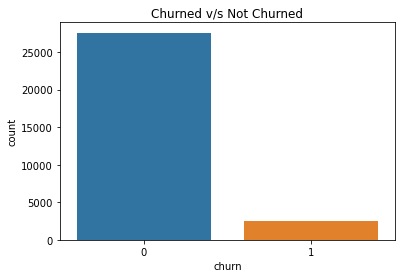

In [40]:
plt.title('Churned v/s Not Churned')
sns.countplot(x='churn', data = telecom_cleaned) # 0 - not churn, 1 - churn
plt.show()

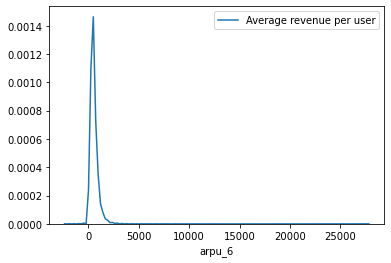

In [41]:
sns.distplot(telecom_cleaned['arpu_6'],hist = False, label = 'Average revenue per user')

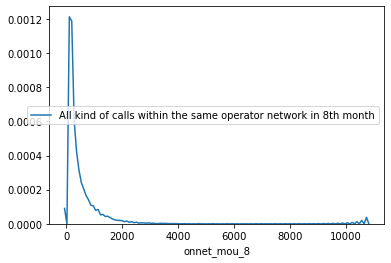

In [42]:
sns.distplot(telecom_cleaned['onnet_mou_8'],hist = False, label = 'All kind of calls within the same operator network in 8th month')

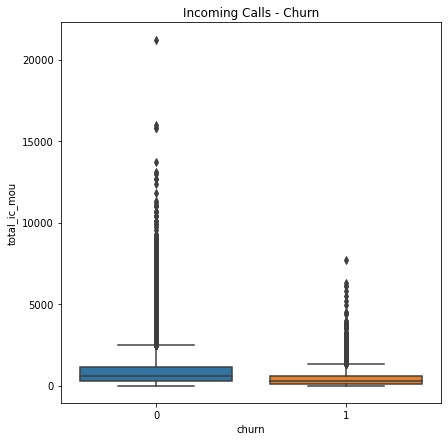

In [43]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.title('Incoming Calls - Churn')
sns.boxplot(telecom_cleaned['churn'], telecom_cleaned['total_ic_mou']) #0 - not churn, 1 - churn
plt.show()

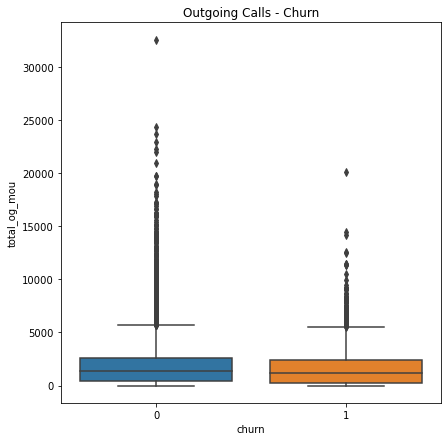

In [44]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.title('Outgoing Calls - Churn')
sns.boxplot(telecom_cleaned['churn'], telecom_cleaned['total_og_mou']) #0 - not churn, 1 - churn
plt.show()

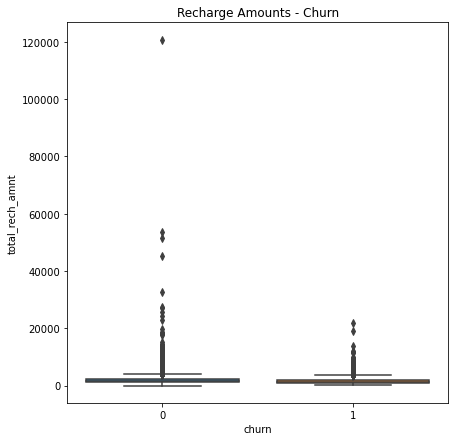

In [45]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.title('Recharge Amounts - Churn')
sns.boxplot(telecom_cleaned['churn'], telecom_cleaned['total_rech_amnt']) #0 - not churn, 1 - churn
plt.show()

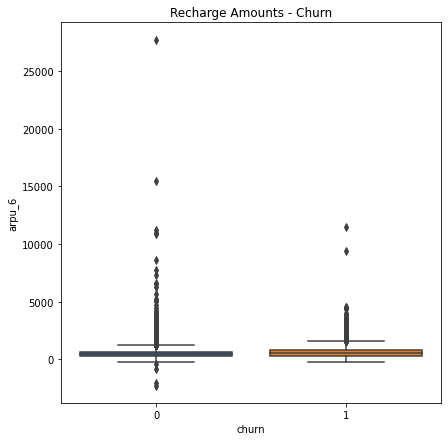

In [46]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.title('Average Revenue per user for Churned & Not-Churned User')
sns.boxplot(telecom_cleaned['churn'], telecom_cleaned['arpu_6']) #0 - not churn, 1 - churn
plt.show()

### Subtask 3.3 : Outlier Treatment - k-sigma technique

In [47]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [48]:
# cap outliers in the numeric columns
telecom_cleaned[num_cols] = telecom_cleaned[num_cols].apply(cap_outliers, axis=0)

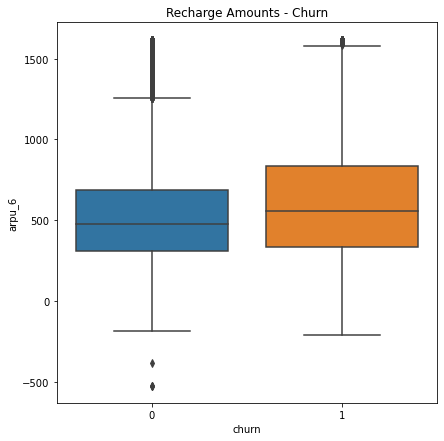

In [49]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
plt.title('Recharge Amounts - Churn')
sns.boxplot(telecom_cleaned['churn'], telecom_cleaned['arpu_6']) #0 - not churn, 1 - churn
plt.show()

### Subtask 3.4 : Train-Test Split

In [50]:
# divide data into train and test
from sklearn.model_selection import train_test_split
X = telecom_cleaned.drop("churn", axis = 1)
y = telecom_cleaned.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [51]:
# print shapes of train and test sets
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((22500, 149), (22500,), (7501, 149), (7501,))

### Subtask 3.5 : Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
telecom_cleaned_scaled = ss.fit_transform(telecom_cleaned)

In [53]:
telecom_cleaned_scaled =  pd.DataFrame(telecom_cleaned_scaled)
telecom_cleaned.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,total_rech_amnt,total_og_mou,total_ic_mou,total_og_t2c
0,197.385,214.816,213.803000,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,...,1,7.7025,-133.03334,-197.490355,-8.549956,-11.865035,866.0,0.00,5.44,2.491556
1,1069.180,1349.850,2014.483901,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,...,1,1961.9650,-3.97000,-184.385000,6.780000,19.895000,6008.0,1446.93,1613.24,0.000000
2,378.721,492.223,137.362000,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.000000,...,0,-298.1100,-347.28000,48.835000,0.000000,0.000000,1158.0,1111.58,148.89,7.150000
3,514.453,597.753,637.760000,102.410000,132.110000,85.14,757.930000,896.680000,983.39,0.000000,...,0,81.6570,-32.12000,156.085000,0.000000,0.000000,1998.0,2957.67,600.02,0.000000
4,74.350,193.897,366.966000,48.960000,50.660000,33.58,85.410000,89.360000,205.89,0.000000,...,0,232.8425,-16.23000,118.505000,0.000000,0.000000,893.0,513.90,640.80,17.710000


In [54]:
### Checking the Churn Rate
churn = (sum(telecom_cleaned['churn'])/len(telecom_cleaned['churn'].index))*100
churn

8.136395453484884

# Step 4. Modelling

### Subtask 4.1 : Logistic Regression Model

In [55]:
import statsmodels.api as sm

In [56]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22350
Model Family:                Binomial   Df Model:                          149
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3726.6
Date:                Sat, 27 Feb 2021   Deviance:                       7453.2
Time:                        14:13:41   Pearson chi2:                 3.09e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7290      0.222     -7.794      0.000      -2.164      -1.294
arpu_6                 0.0003      0.000      0.739      0.460      -0.000       0.001
arpu_7                 0.0002      0.000      0.661      0.509      -0.000       0.001
arpu_8                 0.0012      0.000      2.557      0.011       0.000       0.002
onnet_mou_6            0.0010      0.001      1.707      0.088      -0.000       0.002
onnet_mou_7            0.0009      0.001      1.409      0.159      -0.000       0.002
onnet_mou_8           -0.0012      0.001     -1.349      0.177      -0.003       0.001
offnet_mou_6           0.0005      0.000      0.947      0.343      -0.001       0.001
offnet_mou_7           0.0009      0.001      1.621      0.105      -0.000       0.002
offnet_mou_8          -0.0008      0.001     -1.148      0.251      -0.002       0.001
roam_ic_mou_6         -0.0014      0.001     -1.016      0.310      -0.004       0.001
roam_ic_mou_7          0.0020      0.002      1.276      0.202      -0.001       0.005
roam_ic_mou_8          0.0010      0.002      0.661      0.509      -0.002       0.004
roam_og_mou_6          0.0002      0.001      0.251      0.802      -0.002       0.002
roam_og_mou_7         -0.0004      0.001     -0.403      0.687      -0.003       0.002
roam_og_mou_8          0.0024      0.001      2.461      0.014       0.000       0.004
loc_og_t2t_mou_6       0.0014      0.001      1.108      0.268      -0.001       0.004
loc_og_t2t_mou_7       0.0019      0.001      1.291      0.197      -0.001       0.005
loc_og_t2t_mou_8      -0.0074      0.002     -3.848      0.000      -0.011      -0.004
loc_og_t2m_mou_6       0.0010      0.001      0.890      0.373      -0.001       0.003
loc_og_t2m_mou_7       0.0010      0.001      0.722      0.470      -0.002       0.004
loc_og_t2m_mou_8      -0.0072      0.002     -4.158      0.000      -0.011      -0.004
loc_og_t2f_mou_6      -0.0036      0.005     -0.668      0.504      -0.014       0.007
loc_og_t2f_mou_7      -0.0084      0.006     -1.328      0.184      -0.021       0.004
loc_og_t2f_mou_8       0.0038      0.007      0.551      0.582      -0.010       0.017
loc_og_t2c_mou_6      -0.0011      0.011     -0.099      0.921      -0.023       0.021
loc_og_t2c_mou_7      -0.0080      0.010     -0.792      0.429      -0.028       0.012
loc_og_t2c_mou_8       0.0131      0.013      1.021      0.307      -0.012       0.038
loc_og_mou_6          -0.0018      0.001     -1.433      0.152      -0.004       0.001
loc_og_mou_7          -0.0026      0.001     -1.844      0.065      -0.005       0.000
loc_og_mou_8           0.0120      0.002      6.322      0.000       0.008       0.016
std_og_t2t_mou_6    9.015e-06      0.001      0.015      0.988      -0.001       0.001
std_og_t2t_mou_7      -0.0010      0.0

#### Feature Selection Using RFE

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,

In [60]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jun_vbc_3g', 'arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff',
       'roam_ic_mou_diff', 'roam_og_mou_diff', 'total_rech_amnt',
       'total_og_mou', 'total_ic_mou', 'total_og_t2c'],
      dtype='object', length=134)

##### Assessing the model with StatsModels

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22500
Model:                            GLM   Df Residuals:                    22484
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4497.3
Date:                Sat, 27 Feb 2021   Deviance:                       8994.6
Time:                        14:15:27   Pearson chi2:                 2.27e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6251      0.117    -13.895      0.000      -1.854      -1.396
std_og_t2f_mou_8     -0.0130      0.010     -1.347      0.178      -0.032       0.006
isd_og_mou_7          0.0056      0.002      2.266      0.023       0.001       0.010
total_ic_mou_8       -0.0080      0.000    -24.651      0.000      -0.009      -0.007
isd_ic_mou_8          0.0127      0.001      9.043      0.000       0.010       0.015
ic_others_8           0.0269      0.010      2.778      0.005       0.008       0.046
total_rech_num_7      0.0627      0.005     13.529      0.000       0.054       0.072
total_rech_num_8     -0.1272      0.007    -18.360      0.000      -0.141      -0.114
total_rech_data_6     0.0933      0.018      5.188      0.000       0.058       0.129
total_rech_data_7    -0.0174      0.038     -0.458      0.647      -0.092       0.057
total_rech_data_8    -0.4575      0.086     -5.298      0.000      -0.627      -0.288
night_pck_user_6     -0.0446      0.078     -0.574      0.566      -0.197       0.107
night_pck_user_8     -0.9081      0.109     -8.298      0.000      -1.123      -0.694
sachet_2g_7          -0.0453      0.043     -1.060      0.289      -0.129       0.038
sachet_2g_8           0.3822      0.084      4.548      0.000       0.217       0.547
sep_vbc_3g           -0.0406      0.009     -4.682      0.000      -0.058      -0.024
=====================================================================================
"""

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})

In [64]:
#Create a new column "predicted"
y_train_pred_final['predicted'] = y_train_pred_final['Churn_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

,Churn,Churn_Prob,predicted
0,0,0.076871,0
1,0,0.015109,0
2,1,0.365745,0
3,0,0.072543,0
4,0,0.001133,0
...,...,...,...
22495,0,0.081494,0
22496,0,0.009089,0
22497,1,0.379347,0
22498,0,0.014472,0


In [65]:
from sklearn import metrics

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[20551   118]
 [ 1549   282]]


In [67]:
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [68]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))

In [69]:
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')

Accuracy: 0.93
Sensitivity: 0.15
Specificity: 0.99
Precision: 0.99


#### Ploting ROC Curve

In [70]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

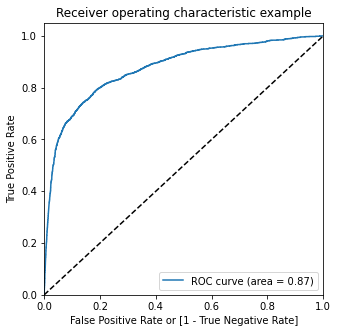

In [72]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.015109,0,1,0,0,0,0,0,0,0,0,0
2,1,0.365745,0,1,1,1,1,0,0,0,0,0,0
3,0,0.072543,0,1,0,0,0,0,0,0,0,0,0
4,0,0.001133,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081378  1.000000  0.000000
0.1   0.1  0.803244  0.797925  0.803716
0.2   0.2  0.894844  0.672310  0.914558
0.3   0.3  0.926311  0.561988  0.958585
0.4   0.4  0.930400  0.320044  0.984469
0.5   0.5  0.925911  0.154014  0.994291
0.6   0.6  0.921956  0.064992  0.997871
0.7   0.7  0.920133  0.025669  0.999371
0.8   0.8  0.919333  0.008738  1.000000
0.9   0.9  0.918667  0.000546  1.000000


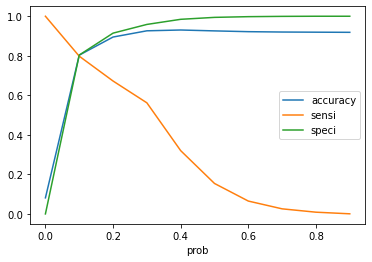

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.015109,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.365745,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.072543,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001133,0,1,0,0,0,0,0,0,0,0,0,0


In [77]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16612,  4057],
       [  370,  1461]], dtype=int64)

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))

In [80]:
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')

Accuracy: 0.8
Sensitivity: 0.8
Specificity: 0.8
Precision: 0.8


### Subtask 4.2 : Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [82]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [87]:
# plotting tree with max_depth=5
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Not Churned', "Churned"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [88]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
con = confusion_matrix(y_train, y_train_pred)

In [91]:
TP = con[1][1]
TN = con[0][0]
FP = con[0][1]
FN = con[1][0]

In [92]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))

In [94]:
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')

Accuracy: 0.95
Sensitivity: 0.55
Specificity: 0.98
Precision: 0.98


### Subtask 4.3 : Random Forest Classification

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [96]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [97]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [98]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9281445435575044
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [99]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[6776  115]
 [ 305  305]]


In [100]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [101]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))

In [102]:
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')

Accuracy: 0.94
Sensitivity: 0.5
Specificity: 0.98
Precision: 0.98
